# HomeWork 1 Question 3

In [38]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

## (PART A) Create the Training Dataset

In [39]:
# uniformly spaced input values xn
training_set = np.linspace(0, 1, 10)

print("training set input values: \n", training_set)

training set input values: 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [40]:
# Create the target dataset 
sine = []
target_set = []

# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    # model
    sine.append(np.sin(2*np.pi*num))
    # gaussian noise: mean 0 and variance 2 (sqrt of standard deviation)
    random_noise =  np.random.normal(loc = 0, scale = np.sqrt(0.2))
    print("Random Noise: ", random_noise)
    target_set.append(np.sin(2*np.pi*num) + random_noise)
    
print("\n Model: \n ", sine)
print("\nTarget set: \n", target_set)

Random Noise:  0.018285847400969182
Random Noise:  0.39336283976542324
Random Noise:  -0.31025798094046736
Random Noise:  0.26789964230017477
Random Noise:  0.03517010005706092
Random Noise:  -0.5759981075115904
Random Noise:  -0.07883823059628853
Random Noise:  0.008229709995642326
Random Noise:  -0.021717380462665394
Random Noise:  -0.16855926915174907

 Model: 
  [0.0, 0.6427876096865393, 0.984807753012208, 0.8660254037844387, 0.3420201433256689, -0.34202014332566866, -0.8660254037844385, -0.9848077530122081, -0.6427876096865396, -2.4492935982947064e-16]

Target set: 
 [0.018285847400969182, 1.0361504494519624, 0.6745497720717406, 1.1339250460846135, 0.3771902433827298, -0.9180182508372591, -0.9448636343807271, -0.9765780430165658, -0.6645049901492049, -0.16855926915174932]


## (PART B) Curve Fitting

Polynomial form:   
-1.602 x + 0.7579


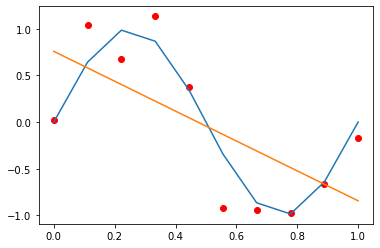

In [41]:
# Polynomial curve fitting using polyfit
# Computes optimal weights
model_1 = np.polyfit(training_set, target_set, 1)
poly_1 = np.poly1d(model_1)
print("Polynomial form: ", poly_1)

# This is an example of underfitting (not complex enough)
# Blue = Model
# Red = Training Data
# Orange = Learned Model
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_1(training_set))

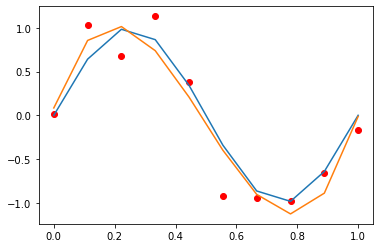

In [42]:
# plotting a model with complexity M = 3
model_3 = np.polyfit(training_set, target_set, 3)
poly_3 = np.poly1d(model_3)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_3(training_set))

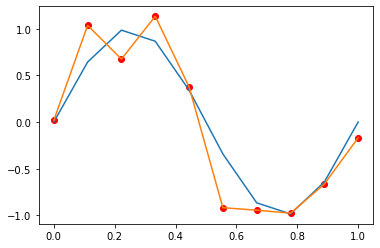

In [43]:
# plotting a model with complexity M = 9
model_9 = np.polyfit(training_set, target_set, 9)
poly_9 = np.poly1d(model_9)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_9(training_set))

If the complexity of the model is too low, it will underfit, meaning that the model will not be accurate on the given training and will not generalize well either. If the complexity of the model is too high, it will overfit, meaning that the model will be extremely accurate on the training data, but will not generalize will to other data sets.  

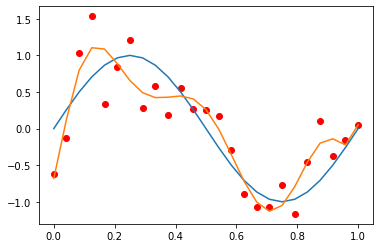

In [44]:
# Now to test complexity M = 9 with varying data set sizes
# N = 25
training_set = np.linspace(0, 1, 25)

sine = []
target_set = []

for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

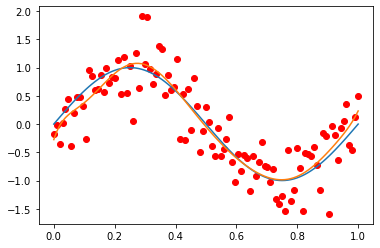

In [75]:
# N = 105
training_set = np.linspace(0, 1, 105)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

The problem of overfitting goes away with the increase in training set size. As the training set increases, the model overfits less (will generalize better). 

## (PART C) Model Selection 


Training targets:  [-0.044723933747730565, 1.088717698844975, 0.9660242972270611, 1.150815755410411, 0.17537043394028115, 0.093454907292078, -0.8356530900056223, -1.4903352045767828, 0.2591495220934762, 0.06630689269271349]

Testing targets:  [0.4698374327447082, 0.4294285879055313, -0.967990144303803, -0.9573109858901533, 0.02641417088639414, -1.2276149190735683, 0.7700720596610209, -0.8131585034263777, 0.14175613145654437, 1.0401392907713638]

Calculating for Complexity:  0

Optimal training weights:   
0.1429

Optimal testing weights:   
-0.1088

Predictions for training set:
[0.14291273 0.14291273 0.14291273 0.14291273 0.14291273 0.14291273
 0.14291273 0.14291273 0.14291273 0.14291273]

Predictions for testing set:
[-0.10884269 -0.10884269 -0.10884269 -0.10884269 -0.10884269 -0.10884269
 -0.10884269 -0.10884269 -0.10884269 -0.10884269]

difference for point (1), complexity (0):  0.1876366616648166

squared difference for point (1), complexity (0): 
0.035207516800716855

difference

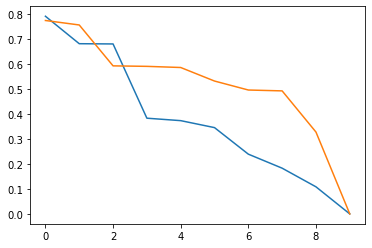

In [80]:
# Will hold RMS results for each complexity 
RMS_training_plot = []
RMS_testing_plot = []

N = 10
input_set_training = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
input_set_testing = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

# target sets for our training and testing data
target_set_training = []
target_set_testing = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Populating our training set targets
for num in input_set_training:
    target_set_training.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))

# Populating our testing set targets using the same model
for num in input_set_testing:
    target_set_testing.append(np.cos(np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
print("\nTraining targets: ", target_set_training)    
print("\nTesting targets: ", target_set_testing)      
    
for M in complexity:
    print("\nCalculating for Complexity: ", M)
    
    # find weights for current complexity with polyfit
    weights_tr = np.polyfit(input_set_training, target_set_training, M)
    poly_tr = np.poly1d(weights_tr)
    print("\nOptimal training weights: ", poly_tr)
    
    weights_t = np.polyfit(input_set_testing, target_set_testing, M)
    poly_t = np.poly1d(weights_t)
    print("\nOptimal testing weights: ", poly_t)
    
    # y(xn, w*) prediction for our current complexity 
    predictions_tr = poly_tr(input_set_training)
    print("\nPredictions for training set:")
    print(predictions_tr)
    
    predictions_t = poly_t(input_set_testing)
    print("\nPredictions for testing set:")
    print(predictions_t)
    
    # Will hold result for (y(xn, w) - tn)^2
    accuracy_tr = []
    accuracy_t = []
    
    # Summation from 1 to N
    for i in range(1, N+1):
        # finding the difference for every true value 
        print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_tr[i-1] - target_set_training[i-1]))
        temp_tr = np.square(predictions_tr[i-1] - target_set_training[i-1])
        print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        print(temp_tr)
        
        print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_t[i-1] - target_set_testing[i-1]))
        temp_t = np.square(predictions_t[i-1] - target_set_testing[i-1])
        print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        print(temp_t)
        
        accuracy_tr.append(temp_tr)
        accuracy_t.append(temp_t)
        
    # Finding E(w*)
    print("\ntraining accuracy array: ", accuracy_tr)
    optimal_error_tr = (0.5 * sum(accuracy_tr))
    print("\ntraining E of w* for complexity: ", M)
    print(optimal_error_tr)
    
    print("\ntesting accuracy array: ", accuracy_t)
    optimal_error_t = (0.5 * sum(accuracy_t))
    print("\ntesting E of w* for complexity: ", M)
    print(optimal_error_t)
    
    RMS_training = np.sqrt((2 * optimal_error_tr)/N)
    print("\nRMS error for training set at complexity: ", M)
    print(RMS_training)
    RMS_training_plot.append(RMS_training)

    RMS_testing = np.sqrt((2 * optimal_error_t)/N)
    print("\nRMS error for testing set at complexity: ", M)
    print(RMS_testing)
    RMS_testing_plot.append(RMS_testing)

print("\nRMS training results:")
print(RMS_training_plot)

print("RMS testing results:")
print(RMS_testing_plot)

plt.plot(complexity, RMS_training_plot)
plt.plot(complexity, RMS_testing_plot)

In [74]:
# (Part D) Overtuning
N = 10
training_set = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
test_set = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
print("\n True values")
print(target_set)
    
for M in complexity: 
    
    # find weights for current complexity with polyfit
    model = np.polyfit(training_set, target_set, M)
    poly = np.poly1d(model)
    print(f"\nWeights at complexity M = {M}:")
    print(poly(training_set))


 True values
[-0.4623426627413134, 0.46205448443693964, 0.9936966796827948, 1.402529267158303, 0.45005634479559464, 0.6694790611777677, -1.258462725963938, -1.7014595098825955, -0.7690820306060858, 0.5363236039149771]

Weights at complexity M = 0:
[0.03227925 0.03227925 0.03227925 0.03227925 0.03227925 0.03227925
 0.03227925 0.03227925 0.03227925 0.03227925]

Weights at complexity M = 1:
[ 0.6014418   0.47496123  0.34848067  0.2220001   0.09551953 -0.03096103
 -0.1574416  -0.28392216 -0.41040273 -0.5368833 ]

Weights at complexity M = 2:
[ 0.40268053  0.40870748  0.38160754  0.32138073  0.22802705  0.10154648
 -0.05806096 -0.25079529 -0.47665649 -0.73564456]

Weights at complexity M = 3:
[-0.7396805   0.78949449  1.33357507  1.16455197  0.55441591 -0.22484239
 -0.90123221 -1.20276282 -0.8574435   0.40671647]

Weights at complexity M = 4:
[-0.48351364  0.47640166  1.09163971  1.20724645  0.81058277  0.03132447
 -0.85853773 -1.44469819 -1.17053633  0.66288333]

Weights at complexity M =

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
# (Part E) Regularization